# **Machine Learning in Bioinformatics**

**Homework 3:**<br/>
!!! If you don't fill these fields, your homework does not count !!!<br/>
first name and last name :Alireza Akbari<br/>
student number : 95105379

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`.<br/>
We highly recommend you to read each line of code carefully and try to 
understand what it exactly does.<br/>
Just alter the parts that is between green comments and specified for you. <br/>
Please do not change other parts.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing


### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label called target.
The original dataset labels are 0 and 1 and in the following code boxes we change it to -1 and 1.

In [2]:
cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
cancer.target = np.where(cancer.target==0, -1, cancer.target)
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO:                                                                        #
# 1- Normalize tha data.                                                       #
# 2- using train_test_split package, split your data into 3 numpy array        #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 70%     test : 20%       validation : 10%                           #
################################################################################
normalizer = preprocessing.MinMaxScaler()
normalized_data = normalizer.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(normalized_data, cancer.target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

69.94727592267135 %
69.94727592267135 %
20.035149384885763 %
20.035149384885763 %
10.017574692442881 %
10.017574692442881 %


# Ensemble Methods

## Problem 1. Bagging (15 points)


Number 0f Classifiers = 1, Validation Accuracy = 96.491228%
Number 0f Classifiers = 3, Validation Accuracy = 98.245614%
Number 0f Classifiers = 5, Validation Accuracy = 96.491228%
Number 0f Classifiers = 10, Validation Accuracy = 100.000000%
Number 0f Classifiers = 20, Validation Accuracy = 100.000000%
Number 0f Classifiers = 50, Validation Accuracy = 100.000000%
Number 0f Classifiers = 100, Validation Accuracy = 100.000000%


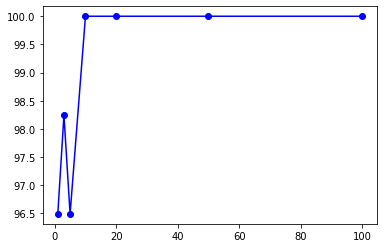

Accuracy for test data:
97.36842105263158


In [5]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
import sklearn


################################################################################
# TODO : initialize the base classifier. You can choose one of the classifiers #
# you have learned in this course.(SVM/Decision tree)                          #
# IMPORTANT: if you are using SVM as base classifier don't forget to add column#
# of '1' s for bias and be careful to use the right datset in next parts.      #
################################################################################
base_cls = sklearn.svm.SVC()
# X_train = np.insert(X_train, 0, 1, axis=1)
# X_val = np.insert(X_val, 0, 1, axis=1)
# X_test = np.insert(X_test, 0, 1, axis=1)
###I have read SKlearn documentation and it says that it handles '1's column for bias. So I commented them
##################################################################################
# TODO: Number of classifiers is a hyperparameter. Choose it by using validation #
# data to have the best accuracy                                                 #
# For different number of classifiers, train the model with training data and    #
# compute accuracy for validation data. Plot accuracy-number of classifiers plot.#
##################################################################################
num_cls = [1, 3, 5, 10, 20, 50, 100]
seed = 1
val_acc_history = []
best_model, best_acc = None, 0
for num in num_cls:
    model = BaggingClassifier(base_estimator = base_cls, 
                              n_estimators = num, 
                              random_state = seed)
    model.fit(X_train,y_train)
    y_val_predict = model.predict(X_val)
    current_val_acc = np.mean(y_val == y_val_predict) * 100
    val_acc_history.append(current_val_acc)
    print('Number 0f Classifiers = %d, Validation Accuracy = %f%%'%(num, current_val_acc))
    
    if best_acc < current_val_acc:
        best_acc = current_val_acc
        best_model = model
plt.plot(num_cls, val_acc_history, '-bo')
plt.show()
################################################################################
# compute and report the accuracy for test data.                               #
################################################################################
y_test_predict = best_model.predict(X_test)
print("Accuracy for test data:")
print(np.mean(y_test == y_test_predict)*100)


## Problem 2. Random Forest(25 points)</br>
In this part, you should write your own code to classify the data, using random forest from sklearn package in python.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#################################################################################
# TODO:use the validation data to determine hyperparameters(number and depth of #
# trees) for the best accuracy                                                  # 
#################################################################################
num_trees = [1, 3, 5, 8, 10, 20, 50]
max_depths = [1, 3, 5, 8, 10, 20, 30]

best_model, best_acc = None, 0
for num_tree in num_trees:
    print("Number of trees = %d"%(num_tree))
    for max_depth in max_depths:
        model = RandomForestClassifier(n_estimators=num_tree, max_depth=max_depth, random_state=1)
        model.fit(X_train, y_train)
        y_val_predict = model.predict(X_val)
        current_val_acc = np.mean(y_val == y_val_predict)*100
        print("Maximum Depth of Trees = %d, Validation Accuracy = %f%%"%(max_depth, current_val_acc))
        
        if best_acc <= current_val_acc:
            best_acc = current_val_acc
            best_model = model

#######################################################################################
#TODO:report accuracy, presition,recall and confusion matrix for train and test data  #
#######################################################################################
y_test_predict = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

print("-------------------------------------------------------")
print("Precision, recall for test data")
print(classification_report(y_test, y_test_predict))


print("-------------------------------------------------------")
print("Confusion Matrix for test data")
print(confusion_matrix(y_test, y_test_predict))

print("-------------------------------------------------------")
print("Accuracy for test data")
print(accuracy_score(y_test, y_test_predict))

y_train_predict = best_model.predict(X_train)
print("-------------------------------------------------------")
print("Precision, recall for train data")
print(classification_report(y_train, y_train_predict))
print("-------------------------------------------------------")
print("Confusion Matrix for train data")
print(confusion_matrix(y_train, y_train_predict))
print("-------------------------------------------------------")
print("Accuracy for test data")
print(accuracy_score(y_train, y_train_predict))

Number of trees = 1
Maximum Depth of Trees = 1, Validation Accuracy = 92.982456%
Maximum Depth of Trees = 3, Validation Accuracy = 98.245614%
Maximum Depth of Trees = 5, Validation Accuracy = 96.491228%
Maximum Depth of Trees = 8, Validation Accuracy = 96.491228%
Maximum Depth of Trees = 10, Validation Accuracy = 96.491228%
Maximum Depth of Trees = 20, Validation Accuracy = 96.491228%
Maximum Depth of Trees = 30, Validation Accuracy = 96.491228%
Number of trees = 3
Maximum Depth of Trees = 1, Validation Accuracy = 92.982456%
Maximum Depth of Trees = 3, Validation Accuracy = 98.245614%
Maximum Depth of Trees = 5, Validation Accuracy = 96.491228%
Maximum Depth of Trees = 8, Validation Accuracy = 94.736842%
Maximum Depth of Trees = 10, Validation Accuracy = 94.736842%
Maximum Depth of Trees = 20, Validation Accuracy = 94.736842%
Maximum Depth of Trees = 30, Validation Accuracy = 94.736842%
Number of trees = 5
Maximum Depth of Trees = 1, Validation Accuracy = 92.982456%
Maximum Depth of Tr

Question:
Explain how you did choose the hyperparameters.</br>

<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		<hr>
        با توجه به آنکه دیتا ولیدیشن از پیش موجود است از تکنیک 
        d-fold 
        ولیدیشن استفاده نمی‌کنیم. اینجا مقادیری را برای دو هایپرپارامتر بیشترین عمق و تعداد درخت‌ها در نظر می‌گیریم. حال به ازای مقادیر مختلف آن‌ها 
        search 
        می‌کنیم و هر بار مدل را با یکی از گزینه‌ها ترین می‌کنیم. سپس مدل را روی داده ولیدیشن تست می‌کنیم. و در نهایت آن گزینه‌ای که بیشترین دقت را روی داده ولیدیشن دارد به عنوان هایپرپارامتر در نظر می‌گیریم. چون این کار را روی داده ولیددیشن انجام دادیم، منجر به 
        overfitting
        نمی‌شود.
    </font>
</div>

## Problem 3. Boosting : AdaBoost (35 points)

In this part you should implement adaptive boosting algorithm. </br>
<picture>
  <img src="http://uupload.ir/files/b919_adaboost.png" alt="Adaboost" width="600" height="300">
</picture>



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
X_train ,X_test ,y_train ,y_test = None ,None ,None ,None
###################################################################
# TODO: use 80% of normalized data as train and 20% as test data. #
###################################################################
X_train, X_test, y_train, y_test = train_test_split(normalized_data, cancer.target, test_size=0.2, random_state=1)

######################################################################
#TODO : define a weak decision tree.                                 #
# initialize these parameters: criterion="entropy" and max_depth = 1 #
######################################################################
Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=1)
#############################################################################################
#TODO : report accuracy of your weak model on train and test data by using cross validation #
#############################################################################################
train_accuracy = np.mean(cross_validate(Tree_model, X_train, y_train)['test_score']) 
print('The training data accuracy is:' ,train_accuracy * 100 , '%')

Tree_model.fit(X_train, y_train)
y_test_predict = Tree_model.predict(X_test)
print('The test data accuracy is:' ,np.mean(y_test == y_test_predict) * 100 , '%')

The training data accuracy is: 89.8901098901099 %
The test data accuracy is: 86.8421052631579 %


In [10]:
class AdaBoost:
    
    def __init__(self,train_data_X,train_data_y,tree_num,test_data_X,test_data_y):
        self.train_data_X = train_data_X
        self.train_data_y = train_data_y
        self.tree_num = tree_num
        self.test_data_X = test_data_X
        self.test_data_y = test_data_y
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
        
    def fit(self):
        Evaluation = pd.DataFrame(self.train_data_y.copy())
        Evaluation.columns = ['target']
        
        ## TODO:Set the initial weights w = 1/N
        Evaluation['weights'] = (1/self.train_data_X.shape[0]) * np.ones(self.train_data_X.shape[0]) 
        
        alphas = [] #list of alphas 
        models = [] # list of trained models
        for t in range(self.tree_num):

            ## TODO: create a weak decisiontree classifier
            Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=1)
            ## TODO: fit the model with train data. set the sample_weight parameter to the 'weights' columns in Evaluation dataframe
            model = Tree_model.fit(self.train_data_X, self.train_data_y, sample_weight=Evaluation['weights']) 
            
            models.append(model)
            predictions = model.predict(self.train_data_X)
            score = model.score(self.train_data_X,self.train_data_y)

            ## Add this columns to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            ## TODO: In each row if the prediction and the target are equal,this column must be '1' and '0' O.W. 
            Evaluation['evaluation'] = (Evaluation['target'] == predictions).astype(int)
            ## TODO: In each row if the tha data is missclassified, this column must be 1.
            Evaluation['misclassified'] = (Evaluation['target'] != predictions).astype(int)

            ## TODO: Calculate the misclassification rate and accuracy and then use them to calculate error
            accuracy = np.sum(Evaluation['evaluation'] * Evaluation['weights']) 
            misclassification = 1 - accuracy
            err = misclassification

            ## TODO: Calculate the alpha values from the adaboost algorithm
            alpha = np.log((1/err) - 1) / 2
            alphas.append(alpha)
            ## TODO: update the weights
            Evaluation['weights'] = Evaluation['weights'] * np.exp(-1*alpha*Evaluation['predictions']*Evaluation['target'])
            Evaluation['weights'] = Evaluation['weights'] / (np.sum(Evaluation['weights']))

        self.alphas = alphas
        self.models = models
        
        
    def predict(self):
        
        accuracy = []
        predictions = []
        cache = []
        #####################################################################################
        #TODO:                                                                              #
        # 1- predict target for test data and append each prediction to the predictions list#
        # 2- Create a list of accuracies which can be used to plot the accuracy against the #
        # number of base learners used for the model                                        #
        #####################################################################################
        for alpha,model in zip(self.alphas,self.models):
            
            current_cache = alpha * model.predict(self.test_data_X)
            cache.append(current_cache)
            prediction = np.sign(np.sum(np.array(cache), axis=0))
            predictions.append(prediction)
            self.accuracy.append(np.mean(prediction == self.test_data_y))
            #print(alpha, model)

            
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))


With a number of  100 base models we receive an accuracy of  100.0 %


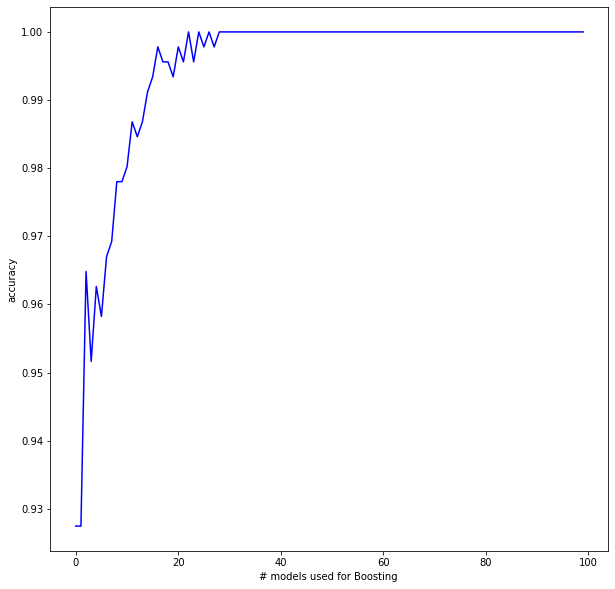

On test data,With a number of  100 base models we receive an accuracy of  95.6140350877193 %


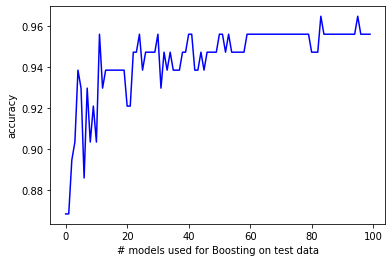

In [15]:
# Accuracy - number of base learners plot for training data

number_of_base_learners = 100

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)



model = AdaBoost(X_train,y_train,number_of_base_learners,X_train,y_train)
model.fit()
model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
plt.show()   
#################################################################### 
# TODO: Plot Accuracy - number of base learners plot for test data #
####################################################################  
model = AdaBoost(X_train,y_train,number_of_base_learners,X_test,y_test)
model.fit()
model.predict()
plt.plot(range(len(model.accuracy)),model.accuracy,'-b')
plt.xlabel('# models used for Boosting on test data')
plt.ylabel('accuracy')
print('On test data,With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
plt.show()

# Feature Selction </br>

## problem4. Filtering : correlation coefficient (25 points)


In [16]:
################################################################################# 
# TODO:                                                                         #
# use 80% of normalized data as train and 20% as test data.(just use the data   # 
# from last part)                                                               #
# 1- compute the correlation coefficient between each feature and target.       #
# 2- Report the features that their correlation is more than 0.5                #
# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5                                                              #
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.                              #
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
# 7 - Do the same with section 3 and compare accuracies.                        #
#################################################################################

#Part one
df.corr()['target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [19]:
#Part two
df['target'] = np.where(cancer.target==0, -1, cancer.target)
the_features = (abs(df.corr()['target']).sort_values(ascending=False) > 0.5)
the_features = the_features.loc[the_features==True].index.tolist()[1:]
print("Features that their correlation is more than 0.5 with target:")
print(the_features)
the_features_index = []
for i in the_features:
    the_features_index.append(df.columns.get_loc(i))


print()    
print("Index of features that their correlation is more than 0.5 with target:")
print(the_features_index)

Features that their correlation is more than 0.5 with target:
['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity', 'mean compactness', 'worst compactness', 'radius error', 'perimeter error', 'area error']

Index of features that their correlation is more than 0.5 with target:
[27, 22, 7, 20, 2, 23, 0, 3, 6, 26, 5, 25, 10, 12, 13]


In [20]:
#Part three
df[the_features].corr()

,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter,worst area,mean radius,mean area,mean concavity,worst concavity,mean compactness,worst compactness,radius error,perimeter error,area error
worst concave points,1.000000,0.816322,0.910155,0.787424,0.771241,0.747419,0.744214,0.722017,0.861323,0.855434,0.815573,0.801080,0.531062,0.554897,0.538166
worst perimeter,0.816322,1.000000,0.855923,0.993708,0.970387,0.977578,0.965137,0.959120,0.729565,0.618344,0.590210,0.529408,0.719684,0.721031,0.761213
mean concave points,0.910155,0.855923,1.000000,0.830318,0.850977,0.809630,0.822529,0.823269,0.921391,0.752399,0.831135,0.667454,0.698050,0.710650,0.690299
worst radius,0.787424,0.993708,0.830318,1.000000,0.969476,0.984015,0.969539,0.962746,0.688236,0.573975,0.535315,0.475820,0.715065,0.697201,0.757373
mean perimeter,0.771241,0.970387,0.850977,0.969476,1.000000,0.941550,0.997855,0.986507,0.716136,0.563879,0.556936,0.455774,0.691765,0.693135,0.744983
worst area,0.747419,0.977578,0.809630,0.984015,0.941550,1.000000,0.941082,0.959213,0.675987,0.543331,0.509604,0.438296,0.751548,0.730713,0.811408
mean radius,0.744214,0.965137,0.822529,0.969539,0.997855,0.941082,1.000000,0.987357,0.676764,0.526911,0.506124,0.413463,0.679090,0.674172,0.735864
mean area,0.722017,0.959120,0.823269,0.962746,0.986507,0.959213,0.987357,1.000000,0.685983,0.512606,0.498502,0.390410,0.732562,0.726628,0.800086
mean concavity,0.861323,0.729565,0.921391,0.688236,0.716136,0.675987,0.676764,0.685983,1.000000,0.884103,0.883121,0.754968,0.631925,0.660391,0.617427
worst concavity,0.855434,0.618344,0.752399,0.573975,0.563879,0.543331,0.526911,0.512606,0.884103,1.000000,0.816275,0.892261,0.380585,0.418899,0.385100


In [35]:
#Part three
df_cor = abs(df[the_features].corr())
df_cor = ((df_cor<0.5).sum() >= 3)
final_features = df_cor[df_cor == True].index.tolist()
print("Features that have less than 0.5 correlation with some of other features the most")
print(final_features)
final_features_index = []
for i in final_features:
    final_features_index.append(df.columns.get_loc(i))
final_features_index = final_features_index
print()
print("Index of features that have less than 0.5 correlation with some of other features the most")
print(final_features_index)
final_features_index = final_features_index[2:5]

Features that have less than 0.5 correlation with some of other features the most
['worst concavity', 'mean compactness', 'worst compactness', 'radius error', 'area error']

Index of features that have less than 0.5 correlation with some of other features the most
[26, 5, 25, 10, 13]


In [32]:
#Part four
from sklearn.linear_model import Perceptron
the_model = Perceptron()
the_model.fit(X_train, y_train)
print("Accuracy of perceptron with all features")
print(the_model.score(X_test, y_test))
print()
print("Sort features based on their weights in perceptron with all features")
print(np.argsort(np.abs(the_model.coef_[0])[:30])[::-1])

Accuracy of perceptron with all features
0.9649122807017544

Sort features based on their weights
[ 7 21 20  6 23 10 22 27 24  9 28 12 26 13  1 15 14 19  3 11 29  5  8 16
 25  2 17 18  0  4]


In [33]:
#Part 6
the_model = Perceptron()
the_model.fit(X_train[:, the_features_index], y_train)
print(the_model.score(X_test[:, the_features_index], y_test))

0.8859649122807017


In [36]:
#Part 7
the_model = Perceptron()
the_model.fit(X_train[:, final_features_index], y_train)
print(the_model.score(X_test[:, final_features_index], y_test))

0.8859649122807017


explanation of part 5 and 6:

<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		<hr>
اهمیت وزن‌های بدست‌آمده در پرسپترون به ترتیب عبارت است از:
        <p dir='ltr'>
[ 7 21 20  6 23 10 22 27 24  9 28 12 26 13  1 15 14 19  3 11 29  5  8 1625  2 17 18  0  4]
            </p>
            فیچرهای بدست‌آمده در بخش دوم عبارتند از:
            <p dir='ltr'>
                [27, 22, 7, 20, 2, 23, 0, 3, 6, 26, 5, 25, 10, 12, 13]
        </p>
        و فیچرهای بدست‌آ«ده در بخش سوم عبارتند از:
        <p dir='ltr'>
            [26, 5, 25, 10, 13]
        </p>
        علت آنکه بیشتر از سه تا هستند این است که یک سری‌شان به تعداد مساوی با دیگر فیچرها کوریلیشن کمتر از ۰.۵ داشتند.
        <br>
        یک سری از فیچرهایی که در قسمت دوم انتخاب شده‌اند، از فیچرهای مهم در الگوریتم پرسپترون بوده‌اند. این حاکی از آن است که این فیچرها به طور کلی ویژگی‌های مهمی بوده‌اند که در دسته‌بندی داده به خوبی‌کمک می‌توانند بکنند. اما هم در فیچرهای قسمت دو و بخصوص در فیچرهای قسمت سه، می‌بینیم که فیچرها مطابقت چندانی ندارند. یکی از مشکلات روش فیلتر هم در واقع همین است که این روش با نادیده گرفتن 
        inductive bias
        یک الگوریتم خاص، تنها فیچرهای با وابستگی خطی بالا را در نظر می‌گیرد. در حالی که می‌دانیم یادگیری بدون 
        inductive bias
        عملا امکان‌پذیر نیست. در نتیجه فیچرها مطابقت زیادی با 
        inductive bias
        الگوریتم پرسپترون نداشته‌اند. از طرفی تعداد ویژگی‌ها ۳۰ عدد است که تعداد زیادی محسوب نمی‌شود و در نتیجه استفاده از تکنیک انتخاب ویژگی لزوما نمی‌تواند کمک بزرگی به یادگیری انجام دهد.
        در نتیجه دقت یادگیری با فیچرهای انتخاب شده کاهش یافته است. اما همچنان دقت نسبتا خوبی را تولید می‌کند.
    </font>
</div>

Question: Is it important to extract features before classifying using methods like decision tree and SVM? why? 

می‌تواند منجر به این شود که 

overfitting

اتفاق نیفتد. چرا که مدل‌های کمتر پیچیده‌ای می‌تواند به خود بگیرد.
همچنین استفاده کردن از بخشی از فیچرها در حالتی که دیتاست بسیار بزرگ باشد می‌تواند به سرعت یادگیری کمک کند

## problem 5. mRMR (10 bonus points) </br>
In this part you should write your own code and classify the data using mRMR method.You can use "pymrmr" package for this part.